# Copulas

In this example, we demonstrate how to apply copulas within the context of the probabilistic library. The library allows to correlate two random variables using a copula function. The following copulas are available in the library: `gaussian`, `gumbel`, `clayton`, and `frank`.

### Define model

First, let's import the necessary classes:

In [41]:
from probabilistic_library import ReliabilityProject, DistributionType, ReliabilityMethod, CorrelationType, CopulaType

We consider the limit state function for wave run-up calculations:

In [42]:
from utils.models import hunt

We define a reliability project:

In [43]:
project = ReliabilityProject()
project.model = hunt

project.model.print()

Model hunt:
Input parameters:
  t_p
  tan_alpha
  h_s
  h_crest
  h
Output parameters:
  Z


In this example, we assign the following distributions to the inputs of the limit state function:

In [44]:
project.variables["t_p"].distribution = DistributionType.uniform
project.variables["t_p"].minimum = 0.01
project.variables["t_p"].maximum = 3.0

project.variables["tan_alpha"].distribution = DistributionType.deterministic
project.variables["tan_alpha"].mean = 0.333333

project.variables["h_s"].distribution = DistributionType.uniform
project.variables["h_s"].minimum = 0.01
project.variables["h_s"].maximum = 3.0

project.variables["h_crest"].distribution = DistributionType.deterministic
project.variables["h_crest"].mean = 3.0

project.variables["h"].distribution = DistributionType.deterministic
project.variables["h"].mean = 1.0

### Define reliability method

The reliability analysis is performed using the `crude_monte_carlo` reliability method:

In [45]:
project.settings.reliability_method = ReliabilityMethod.crude_monte_carlo
project.settings.minimum_samples = 10000
project.settings.maximum_samples = 10000
project.settings.variation_coefficient = 0.05
project.settings.save_realizations = True

### Gaussian copula

Let's correlate the variables $t_p$ and $h_s$ using a Gaussian copula. It is then necessary to use copulas as the correlation type (`CorrelationType.copulas`) and to specify both the copula type (`gaussian`, in this case) and the corresponding copula parameter.

The parameter of a Gaussian copula is a correlation coefficient that can vary between $-1$ and $1$.

Reliability:
 Reliability index = 1.992
 Probability of failure = 0.0232
 Convergence = 0.06489 (not converged)
 Model runs = 10001
Alpha values:
 t_p: alpha = -0.911, x = 2.896
 tan_alpha: alpha = 0, x = 0.3333
 h_s: alpha = -0.4124, x = 2.842
 h_crest: alpha = 0, x = 3
 h: alpha = 0, x = 1



<module 'matplotlib.pyplot' from 'c:\\Users\\wojciech\\AppData\\Local\\miniforge3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

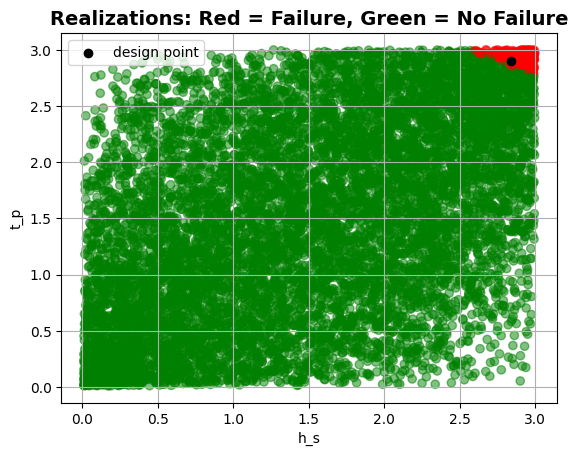

In [46]:
par = 0.5

project.correlation_type = CorrelationType.copulas
project.copulas["t_p", "h_s"] = (par, CopulaType.gaussian)
project.run()

project.design_point.print()
project.design_point.get_plot_realizations()


### Gumbel copula

Let's correlate the variables $t_p$ and $h_s$ using a Gumbel copula. The parameter of the copula must be equal to or greater than $1.0$.

Reliability:
 Reliability index = 1.634
 Probability of failure = 0.0511
 Convergence = 0.04309 (converged)
 Model runs = 10001
Alpha values:
 t_p: alpha = -0.9983, x = 2.846
 tan_alpha: alpha = 0, x = 0.3333
 h_s: alpha = -0.05871, x = 2.842
 h_crest: alpha = 0, x = 3
 h: alpha = 0, x = 1



<module 'matplotlib.pyplot' from 'c:\\Users\\wojciech\\AppData\\Local\\miniforge3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

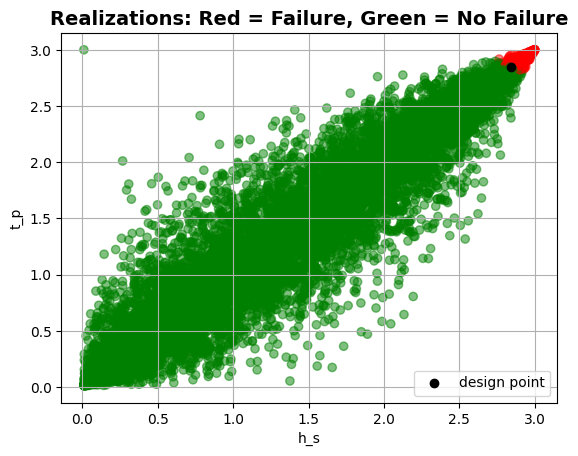

In [ ]:
par = 5.0

project.correlation_type = CorrelationType.copulas
project.copulas["t_p", "h_s"] = (par, CopulaType.gumbel)
project.run()

project.design_point.print()
project.design_point.get_plot_realizations()


### Clayton copula

Let's correlate the variables $t_p$ and $h_s$ using a Clayton copula. The parameter of the copula must be greater than or equal to $-1.0$ and must not be equal to zero.

Reliability:
 Reliability index = 1.951
 Probability of failure = 0.0255
 Convergence = 0.06182 (not converged)
 Model runs = 10001
Alpha values:
 t_p: alpha = -0.9142, x = 2.889
 tan_alpha: alpha = 0, x = 0.3333
 h_s: alpha = -0.4053, x = 2.861
 h_crest: alpha = 0, x = 3
 h: alpha = 0, x = 1



<module 'matplotlib.pyplot' from 'c:\\Users\\wojciech\\AppData\\Local\\miniforge3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

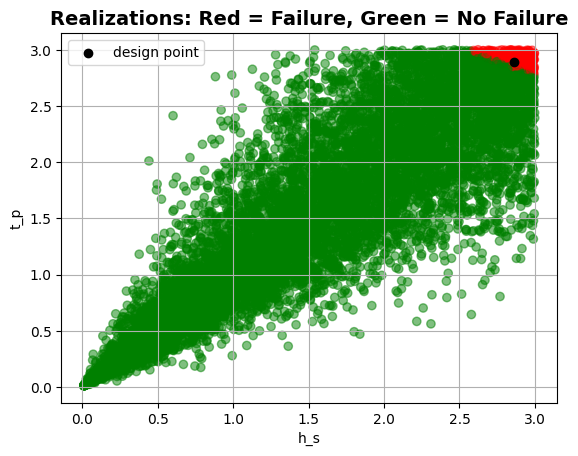

In [48]:
par = 5.0

project.correlation_type = CorrelationType.copulas
project.copulas["t_p", "h_s"] = (par, CopulaType.clayton)
project.run()

project.design_point.print()
project.design_point.get_plot_realizations()

### Frank copula

Let's correlate the variables $t_p$ and $h_s$ using a Frank copula. The parameter of the copula can be any real number except $0.0$.

Reliability:
 Reliability index = 2.016
 Probability of failure = 0.0219
 Convergence = 0.06683 (not converged)
 Model runs = 10001
Alpha values:
 t_p: alpha = -0.894, x = 2.893
 tan_alpha: alpha = 0, x = 0.3333
 h_s: alpha = -0.448, x = 2.859
 h_crest: alpha = 0, x = 3
 h: alpha = 0, x = 1



<module 'matplotlib.pyplot' from 'c:\\Users\\wojciech\\AppData\\Local\\miniforge3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

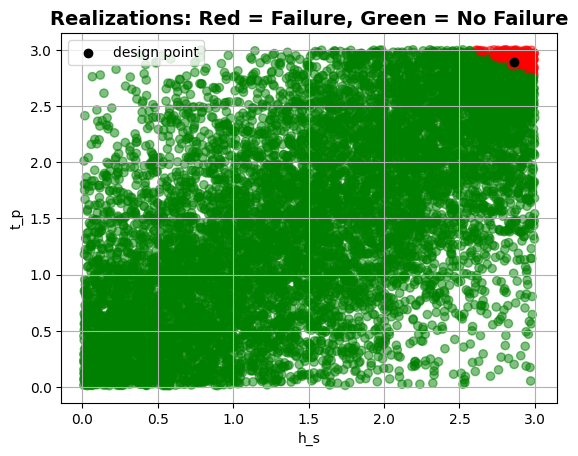

In [49]:
par = 5.0

project.correlation_type = CorrelationType.copulas
project.copulas["t_p", "h_s"] = (par, CopulaType.frank)
project.run()

project.design_point.print()
project.design_point.get_plot_realizations()

Now, let us assume that the parameters $tan_{\alpha}$ and $h_{crest}$ are also random variables. 

It is then possible, for example, to correlate $t_p$ with $h_s$ and $tan_{\alpha}$ with $h_{crest}$. However, it is not possible to correlate, for example, $t_p$ with $h_{crest}$.

Reliability:
 Reliability index = 1.002
 Probability of failure = 0.1582
 Convergence = 0.02307 (converged)
 Model runs = 10001
Alpha values:
 t_p: alpha = -0.9603, x = 2.498
 tan_alpha: alpha = -0.2649, x = 0.4328
 h_s: alpha = -0.08489, x = 2.488
 h_crest: alpha = 0.02202, x = 3.056
 h: alpha = 0, x = 1



<module 'matplotlib.pyplot' from 'c:\\Users\\wojciech\\AppData\\Local\\miniforge3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

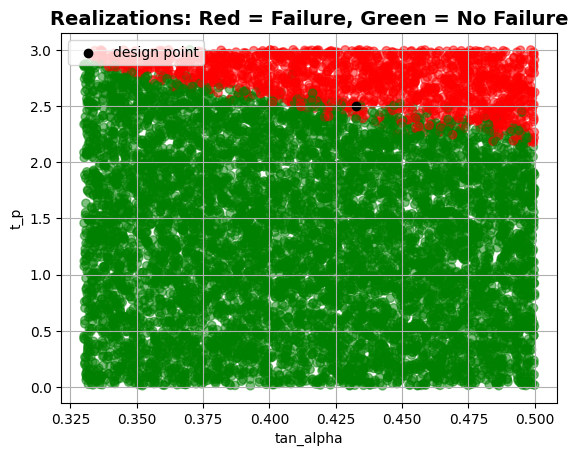

In [50]:
project.variables["h_crest"].distribution = DistributionType.uniform
project.variables["h_crest"].minimum = 3.0
project.variables["h_crest"].maximum = 3.1

project.variables["tan_alpha"].distribution = DistributionType.uniform
project.variables["tan_alpha"].minimum = 0.33
project.variables["tan_alpha"].maximum = 0.5

project.correlation_type = CorrelationType.copulas
project.copulas["t_p", "h_s"] = (5.0, CopulaType.gumbel)
project.copulas["tan_alpha", "h_crest"] = (3.0, CopulaType.frank)

project.run()
project.design_point.print()
project.design_point.get_plot_realizations()